## Waste classification using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Install Tensorflow using pip install tensorflow

In [2]:
# Import the important python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_path = "Dataset/TRAIN"
test_path = "Dataset/TEST"

In [4]:
# Import other libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization 
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:26<00:00, 115.32it/s]


In [6]:
data.shape 

(22564, 2)

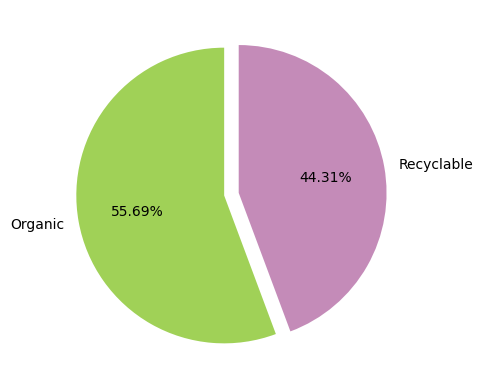

In [7]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels= ['Organic','Recyclable'], autopct= '%0.2f%%', colors= colors, startangle= 90, explode= [0.05,0.05])
plt.show()

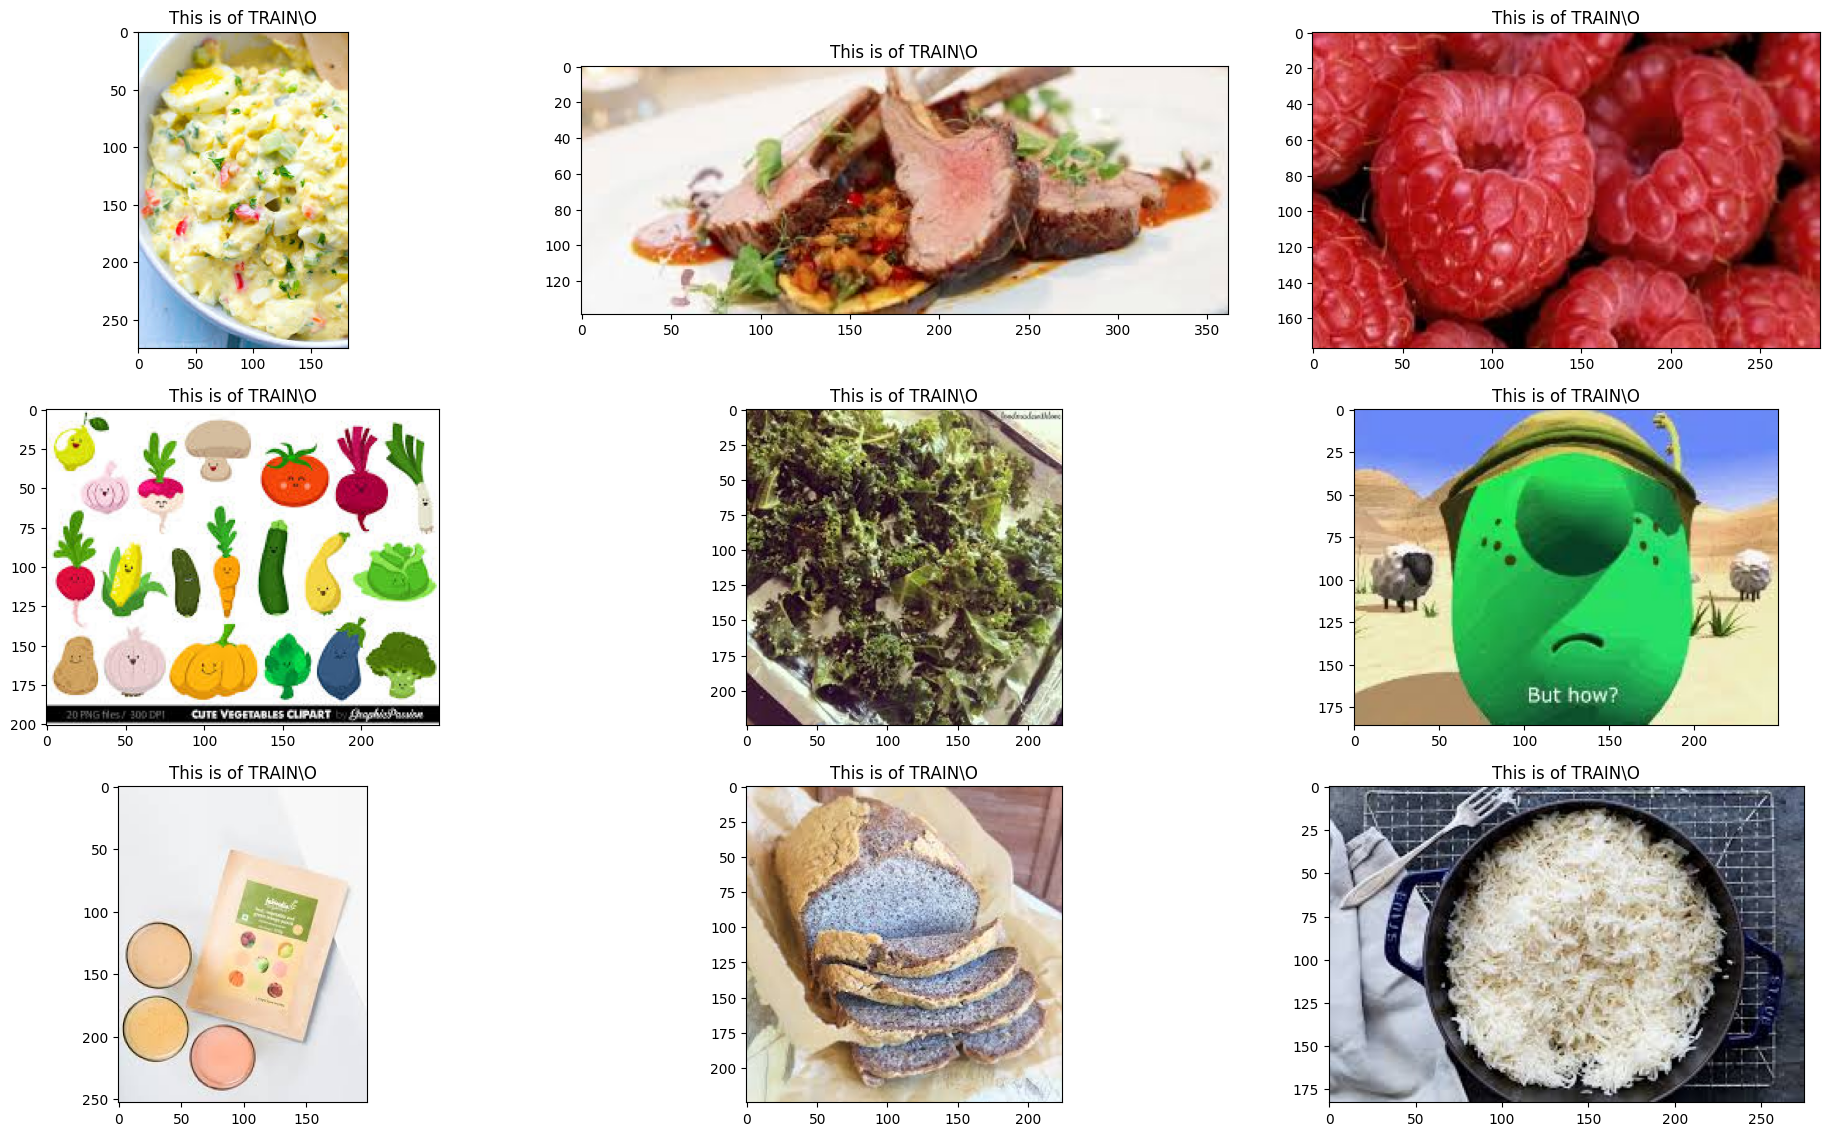

In [8]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy" ,
              optimizer = "adam" ,
              metrics = ["accuracy"])
batch_size = 256

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 22564 images belonging to 2 classes.


In [14]:
test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)

Found 2513 images belonging to 2 classes.


In [15]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.6718 - loss: 0.7207 - val_accuracy: 0.8882 - val_loss: 0.3667
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.8249 - loss: 0.4277 - val_accuracy: 0.8782 - val_loss: 0.3379
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 344s 4s/step - accuracy: 0.8410 - loss: 0.3944 - val_accuracy: 0.8715 - val_loss: 0.3184
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.8572 - loss: 0.3545 - val_accuracy: 0.8906 - val_loss: 0.2762
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.8727 - loss: 0.3282 - val_accuracy: 0.8965 - val_loss: 0.2629
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.8845 - loss: 0.2991 - val_accuracy: 0.8973 - val_loss: 0.2744
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.8919 - loss: 0.2724 - val_accuracy: 0.8540 - val_loss: 0.3451
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.9003 - loss: 0.2542 - val_accuracy: 0.8918 - v

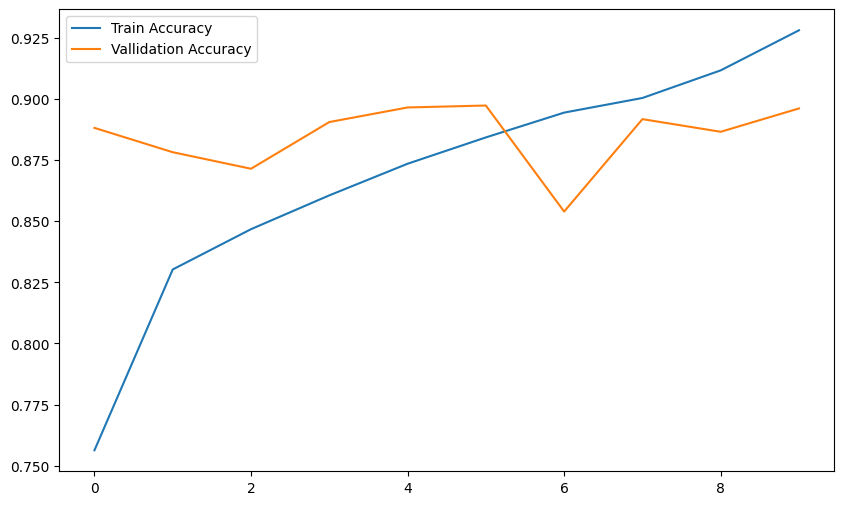

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label = 'Train Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Vallidation Accuracy')
plt.legend()
plt.show()

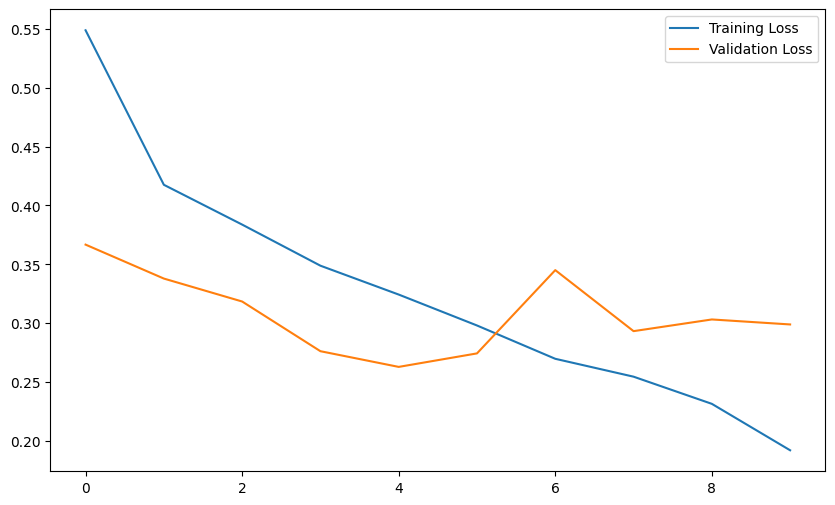

In [17]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [18]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224,224))
    img = np.reshape(img, [-1,224,224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print('The image shown is Organic Waste')
    elif result == 1: print('The image shown is Recyclable')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
The image shown is Recyclable


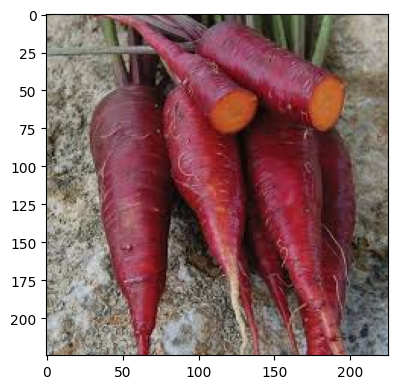

In [19]:
test_img = cv2.imread('Dataset/TEST/O/O_12571.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The image shown is Organic Waste


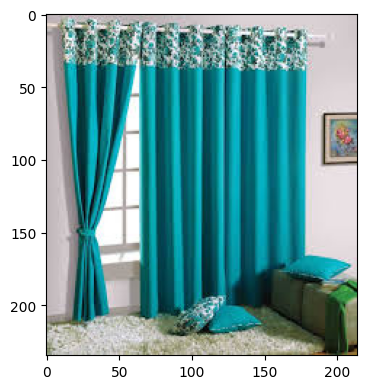

In [20]:
test_img = cv2.imread('Dataset/TEST/R/R_10012.jpg')
predict_fun(test_img)

In [22]:
import tensorflow as tf

In [24]:
model.save("waste_classification_model.keras")